In [1]:
from gw_hyp import hyp_pta_res
from enterprise.pulsar import Pulsar
 
import enterprise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datadir = f"{enterprise.__path__[0]}/datafiles/mdc_open1"
parfile = f"{datadir}/J0030+0451.par"
timfile = f"{datadir}/J0030+0451.tim"

In [3]:
psr = Pulsar(parfile, timfile)

[tempo2Util.C:396] Warning: [TIM1] Please place MODE flags in the parameter file 


In [4]:
def hms_to_rad(hh, mm, ss):
    sgn = np.sign(hh)
    return sgn * (sgn * hh + mm / 60 + ss / 3600) * np.pi / 12


def dms_to_rad(dd, mm, ss):
    sgn = np.sign(dd)
    return sgn * (sgn * dd + mm / 60 + ss / 3600) * np.pi / 180

In [5]:
M=2e10 
q=1
e0=1.1
b=40
ti=-5
tf=5
t_step=1000
inc=np.pi/3
distance=5
order=3

In [6]:
# from constants import *
# Time=M*tsun

# ts = (psr.toas - tref1)/Time

# # ti, tf, tzs in seconds, in source frame
# ti = min(ts)
# tf = max(ts)
# (tf-ti)*Time/yr

In [7]:
RA_GW = hms_to_rad(4, 0, 0)
DEC_GW = dms_to_rad(-45, 0, 0)

S0 = 1e-6

In [8]:
tref1 = (max(psr.toas)+min(psr.toas))/2

In [9]:
hyp_gw = hyp_pta_res(
    cos_gwtheta=np.sin(DEC_GW),
    gwphi=RA_GW,
    psi=0,
    cos_inc=np.cos(inc),
    log10_M=np.log10(M),
    q=q,
    b=b,
    e0=e0,
    tref=tref1,
    log10_S=np.log10(S0)
)

In [10]:
hyp_gw_fn = hyp_gw(name="hyp_gw", psr=psr)

res= hyp_gw_fn()

In [11]:
yr=365.25*24*3600

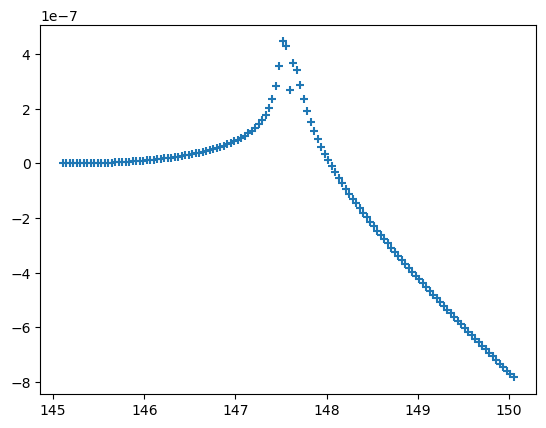

In [12]:
toas = psr.toas / yr
plt.scatter(toas, res, marker="+")

In [ ]:
toas = psr.toas / (365.25*24*3600)
plt.scatter(toas, amp*res, marker="+")

In [ ]:
from constants import *
Time=M*tsun
ts = (toas - tref1)/Time

# ti, tf, tzs in seconds, in source frame
ti = min(ts)
tf = max(ts)

In [ ]:
get_D_GW(1e-7,M,q,e0,b,ti,tf,3)/pc